<IPython.core.display.Javascript object>


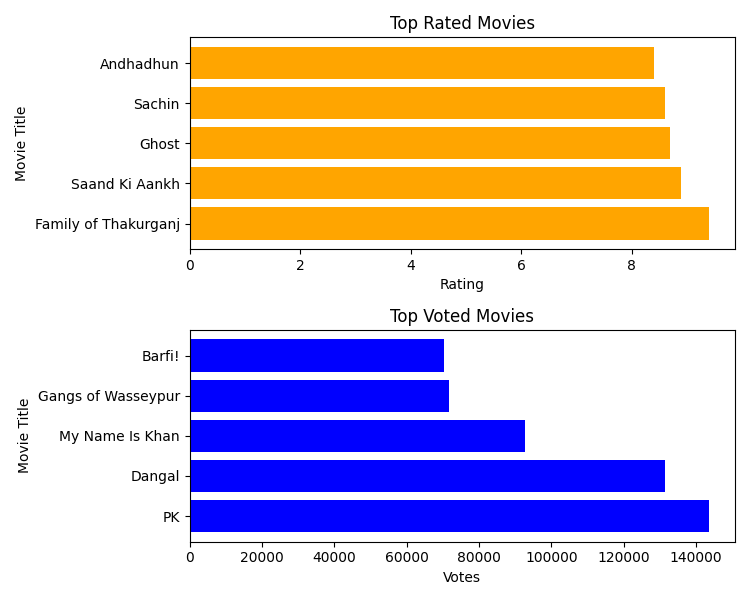

/tmp/ipykernel_282460/457914643.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rated_by_year.sort_values(by='year_of_release', inplace = True)
/tmp/ipykernel_282460/457914643.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_voted_by_year.sort_values(by='year_of_release', inplace = True)


<IPython.core.display.Javascript object>


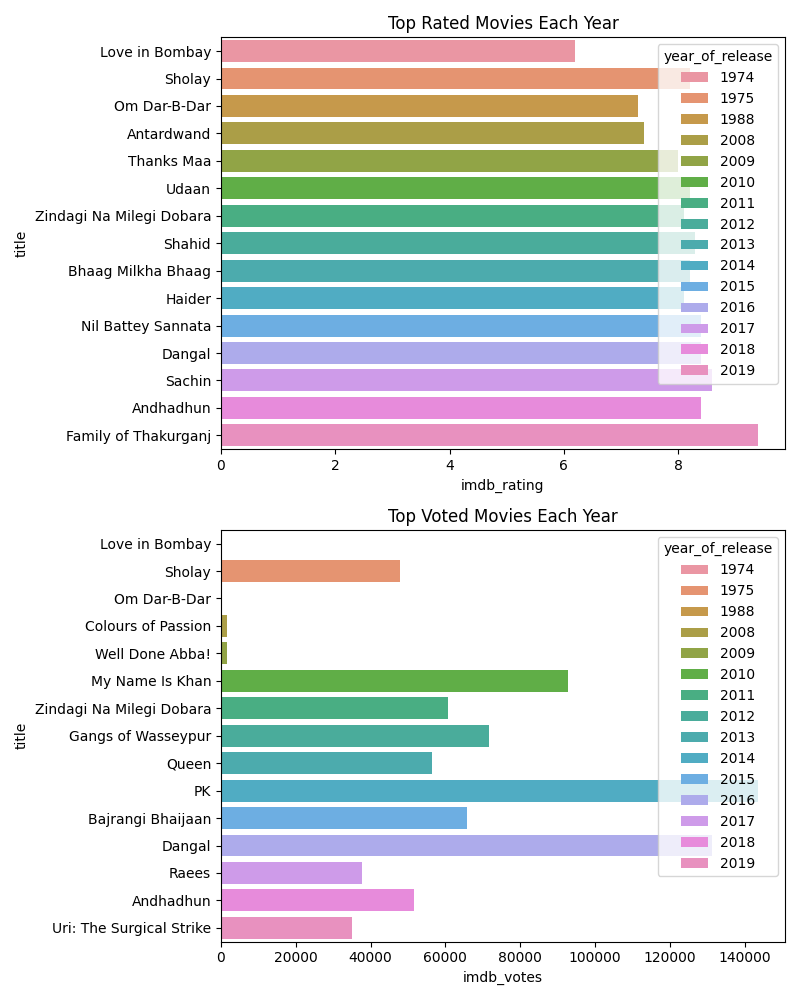

/home/phil/projects/my_project_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/phil/projects/my_project_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/phil/projects/my_project_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

<IPython.core.display.Javascript object>


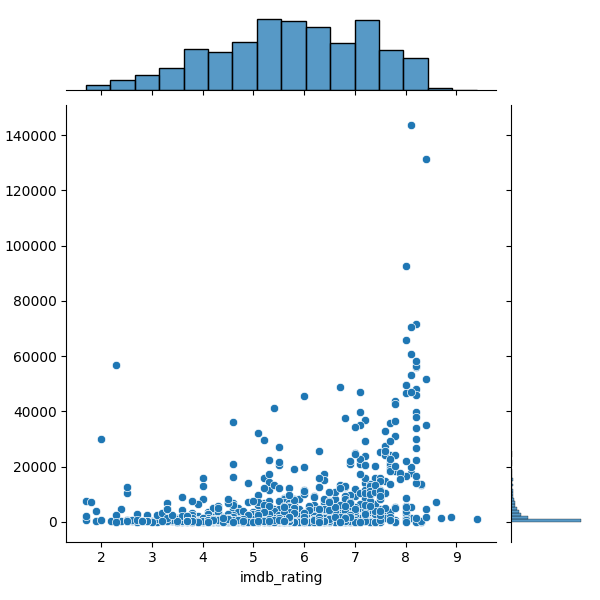


The correlation between rating and voting is very low (0.35719496124777383)


In [155]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Ingestion
movies= pd.read_csv("~/projects/datasets/Bollywood Data/2010-2019/bollywood_meta_2010-2019.csv")
ratings = pd.read_csv("~/projects/datasets/Bollywood Data/2010-2019/bollywood_ratings_2010-2019.csv")

## Data Handling
ratings.dropna(inplace = True)
movies.dropna(how = 'all', inplace = True)
movies.drop_duplicates(inplace = True)
ratings.drop_duplicates(inplace = True)
ratings = ratings[ratings['imdb_votes'] !=0]

## Merging Datasets
df = pd.merge(movies, ratings)
df.drop(columns = ["is_adult", "runtime", "genres", "original_title"], inplace = True)

##Top Five Movies That Got The Highest Rating and Voting
top_five_ratings = df.sort_values(by= "imdb_rating", ascending = False).head(5)
top_five_votings = df.sort_values(by = "imdb_votes", ascending = False). head(5)
fig1, axis1 = plt.subplots(2,1, figsize= (7.5, 6))
axis1[0].barh(top_five_ratings['title'], top_five_ratings['imdb_rating'], color = "orange")
axis1[1].barh(top_five_votings['title'], top_five_votings['imdb_votes'], color = "blue")
axis1[0].set(ylabel='Movie Title', xlabel='Rating', title = 'Top Rated Movies')
axis1[1].set(ylabel='Movie Title', xlabel='Votes', title = 'Top Voted Movies')
plt.tight_layout()

## Year wise movie with highest rating and voting
dfrated = df[["year_of_release", "title", "imdb_rating"]].sort_values(by="imdb_rating", ascending=False)
dfvoted = df[["year_of_release", "title", "imdb_votes"]].sort_values(by="imdb_votes", ascending=False)
top_rated_by_year = dfrated.groupby(by=['year_of_release']).head(1)
top_voted_by_year = dfvoted.groupby(by=['year_of_release']).head(1)
top_rated_by_year.sort_values(by='year_of_release', inplace = True)
top_voted_by_year.sort_values(by='year_of_release', inplace = True)
plt.tight_layout()

fig2, axis2 = plt.subplots(2,1, figsize= (8,10))
sns.barplot(top_rated_by_year['imdb_rating'], top_rated_by_year['title'], ax=axis2[0], hue = top_rated_by_year['year_of_release'], dodge=False).set(title='Top Rated Movies Each Year')
sns.barplot(top_voted_by_year['imdb_votes'], top_voted_by_year['title'], ax=axis2[1], hue = top_voted_by_year['year_of_release'], dodge=False).set(title='Top Voted Movies Each Year')
plt.tight_layout()


## Is there any correlation between the rating and the voting
correlation = df['imdb_rating'].corr(df['imdb_votes'])
sns.jointplot(df.imdb_rating, df.imdb_votes)
print("\nThe correlation between rating and voting is very low (" + str(correlation) + ")")